In [1]:
#importing the required libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D

In [2]:
tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\ivan\\Micro_Organism",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 481 files belonging to 4 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
batch_size = 32
img_height = 56
img_width = 56

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "C:\\Users\\ivan\\Micro_Organism",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 481 files belonging to 4 classes.
Using 385 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "C:\\Users\\ivan\\Micro_Organism",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 481 files belonging to 4 classes.
Using 96 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria']


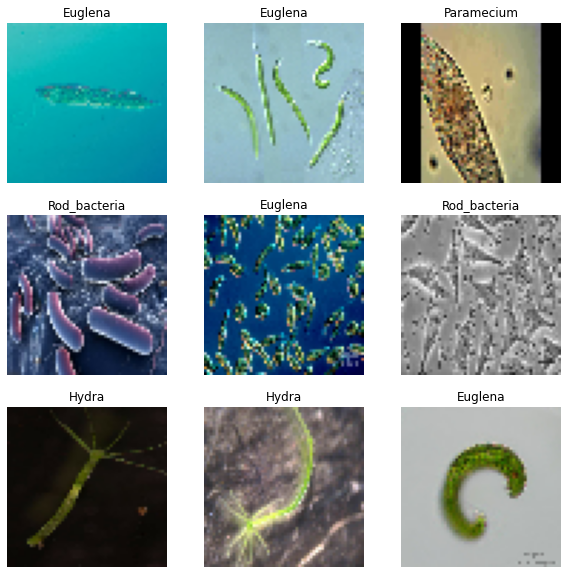

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(56,56,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))                  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu')) 
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(train_ds,epochs=10)

Epoch 1/10
13/13 [==============================] - 3s 121ms/step - loss: 16.7602 - accuracy: 0.2519
Epoch 2/10
13/13 [==============================] - 3s 133ms/step - loss: 1.8044 - accuracy: 0.3429
Epoch 3/10
13/13 [==============================] - 3s 116ms/step - loss: 1.2541 - accuracy: 0.4078
Epoch 4/10
13/13 [==============================] - 3s 118ms/step - loss: 1.0922 - accuracy: 0.5351
Epoch 5/10
13/13 [==============================] - 3s 111ms/step - loss: 0.9469 - accuracy: 0.6286
Epoch 6/10
13/13 [==============================] - 2s 112ms/step - loss: 0.9164 - accuracy: 0.6130
Epoch 7/10
13/13 [==============================] - 2s 113ms/step - loss: 0.8103 - accuracy: 0.6675
Epoch 8/10
13/13 [==============================] - 2s 111ms/step - loss: 0.7829 - accuracy: 0.7065
Epoch 9/10
13/13 [==============================] - 2s 112ms/step - loss: 0.6152 - accuracy: 0.8156
Epoch 10/10
13/13 [==============================] - 2s 115ms/step - loss: 0.5438 - accuracy: 0.784

In [18]:
#evaluting the model
model.evaluate(val_ds)

3/3 [==============================] - 1s 30ms/step - loss: 1.2412 - accuracy: 0.5833


[1.2412199974060059, 0.5833333134651184]